## Note: The instructions laid out in the numbered ipynb files are somwhat incomplete as we continue to develp JetPointNet. If you are looking to run the model yourself, please reach out.

In [26]:
import sys
from pathlib import Path
REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))
import os

from data_processing.jets.preprocessing_header import AWK_SAVE_LOC, MAX_SAMPLE_LENGTH, LEN, MIN_TRACK_POINTS, ROOT_FILES_DIR, LEN_OUTPUT_DIRECTORY_NAME, LEN_DATASET_NAME, prefix_match, prefix_to_set
from data_processing.jets.jets_max_sample_length import find_global_max_sample_length

import re
from pathlib import Path
import random
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import uproot
import glob

## Calculate the Number of Tracks per event from a random sample of 3 files

In [27]:
potential_root_files = glob.glob(os.path.join(ROOT_FILES_DIR, "**/*.root"), recursive=True)
#root_files = [entry for entry in potential_root_files if os.path.isfile(entry)]

sample_files = {}
for set_name in prefix_match:
    root_files = [entry for entry in potential_root_files if os.path.isfile(entry) and entry.split('/')[-1].startswith(prefix_match[set_name])]
    sample_files[set_name] = random.sample(root_files, 3)

In [30]:
nTracks_list = {}

for set_name in sample_files:
    file_nTracks = []
    for file in sample_files[set_name]:
        with uproot.open(file + ":EventTree") as events:
            file_nTracks.extend(events['nTrack'].array())
    nTracks_list[set_name] = file_nTracks


['runNumber', 'eventNumber', 'lumiBlock', 'coreFlags', 'mcEventNumber', 'mcChannelNumber', 'mcEventWeight', 'nTruthPart', 'truthPartBarcode', 'truthPartPdgId', 'G4PreCalo_n_EM', 'G4PreCalo_E_EM', 'G4PreCalo_n_Had', 'G4PreCalo_E_Had', 'truthVertexX', 'truthVertexY', 'truthVertexZ', 'truthPartStatus', 'truthPartPt', 'truthPartE', 'truthPartMass', 'truthPartEta', 'truthPartPhi', 'nTrack', 'trackPt', 'trackP', 'trackMass', 'trackEta', 'trackPhi', 'trackTruthParticleIndex', 'trackVisibleCalHitCaloEnergy', 'trackFullCalHitCaloEnergy', 'trackSubtractedCaloEnergy', 'trackNumberOfPixelHits', 'trackNumberOfSCTHits', 'trackNumberOfPixelDeadSensors', 'trackNumberOfSCTDeadSensors', 'trackNumberOfPixelSharedHits', 'trackNumberOfSCTSharedHits', 'trackNumberOfPixelHoles', 'trackNumberOfSCTHoles', 'trackNumberOfInnermostPixelLayerHits', 'trackNumberOfNextToInnermostPixelLayerHits', 'trackExpectInnermostPixelLayerHit', 'trackExpectNextToInnermostPixelLayerHit', 'trackNumberOfTRTHits', 'trackNumberOfTRTO

NameError: name 'nCells' is not defined

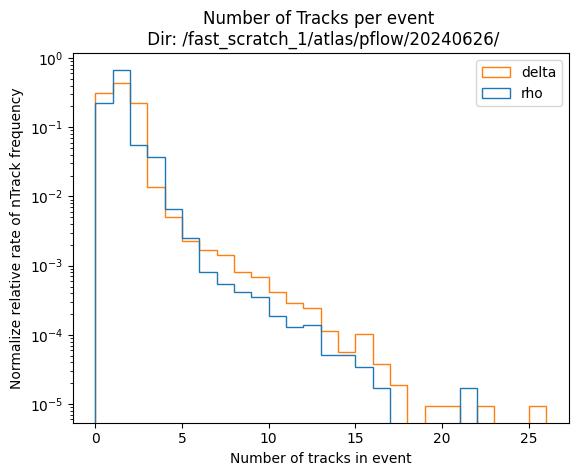

In [29]:
plt.title(f"Number of Tracks per event \n Dir: {ROOT_FILES_DIR}")

max_nTracks = max([max(i) for i in nTracks_list.values()])

#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(nTracks_list.values(), label=nTracks_list.keys(), bins=max_nTracks, histtype='step', fill=False, density=True)
plt.legend()
plt.xlabel("Number of tracks in event")
plt.ylabel("Normalize relative rate of nTrack frequency")
plt.yscale('log')

In [33]:
temp = ['runNumber', 'eventNumber', 'lumiBlock', 'coreFlags', 'mcEventNumber', 'mcChannelNumber', 'mcEventWeight', 'nTruthPart', 'truthPartBarcode', 'truthPartPdgId', 'G4PreCalo_n_EM', 'G4PreCalo_E_EM', 'G4PreCalo_n_Had', 'G4PreCalo_E_Had', 'truthVertexX', 'truthVertexY', 'truthVertexZ', 'truthPartStatus', 'truthPartPt', 'truthPartE', 'truthPartMass', 'truthPartEta', 'truthPartPhi', 'nTrack', 'trackPt', 'trackP', 'trackMass', 'trackEta', 'trackPhi', 'trackTruthParticleIndex', 'trackVisibleCalHitCaloEnergy', 'trackFullCalHitCaloEnergy', 'trackSubtractedCaloEnergy', 'trackNumberOfPixelHits', 'trackNumberOfSCTHits', 'trackNumberOfPixelDeadSensors', 'trackNumberOfSCTDeadSensors', 'trackNumberOfPixelSharedHits', 'trackNumberOfSCTSharedHits', 'trackNumberOfPixelHoles', 'trackNumberOfSCTHoles', 'trackNumberOfInnermostPixelLayerHits', 'trackNumberOfNextToInnermostPixelLayerHits', 'trackExpectInnermostPixelLayerHit', 'trackExpectNextToInnermostPixelLayerHit', 'trackNumberOfTRTHits', 'trackNumberOfTRTOutliers', 'trackChiSquared', 'trackNumberDOF', 'trackD0', 'trackZ0', 'trackEta_PreSamplerB', 'trackPhi_PreSamplerB', 'trackEta_PreSamplerE', 'trackPhi_PreSamplerE', 'trackEta_EMB1', 'trackPhi_EMB1', 'trackEta_EMB2', 'trackPhi_EMB2', 'trackEta_EMB3', 'trackPhi_EMB3', 'trackEta_EME1', 'trackPhi_EME1', 'trackEta_EME2', 'trackPhi_EME2', 'trackEta_EME3', 'trackPhi_EME3', 'trackEta_HEC0', 'trackPhi_HEC0', 'trackEta_HEC1', 'trackPhi_HEC1', 'trackEta_HEC2', 'trackPhi_HEC2', 'trackEta_HEC3', 'trackPhi_HEC3', 'trackEta_TileBar0', 'trackPhi_TileBar0', 'trackEta_TileBar1', 'trackPhi_TileBar1', 'trackEta_TileBar2', 'trackPhi_TileBar2', 'trackEta_TileGap1', 'trackPhi_TileGap1', 'trackEta_TileGap2', 'trackPhi_TileGap2', 'trackEta_TileGap3', 'trackPhi_TileGap3', 'trackEta_TileExt0', 'trackPhi_TileExt0', 'trackEta_TileExt1', 'trackPhi_TileExt1', 'trackEta_TileExt2', 'trackPhi_TileExt2', 'nCluster', 'cluster_E', 'cluster_E_LCCalib', 'cluster_Pt', 'cluster_Eta', 'cluster_Phi', 'cluster_widthEta', 'cluster_widthPhi', 'cluster_nCells', 'cluster_ENG_CALIB_TOT', 'cluster_ENG_CALIB_OUT_T', 'cluster_ENG_CALIB_DEAD_TOT', 'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT', 'cluster_OOC_WEIGHT', 'cluster_DM_WEIGHT', 'cluster_CENTER_MAG', 'cluster_FIRST_ENG_DENS', 'cluster_CENTER_LAMBDA', 'cluster_ISOLATION', 'cluster_ENERGY_DigiHSTruth', 'cluster_cell_ID', 'cluster_cell_E', 'cluster_fullHitsTruthIndex', 'cluster_fullHitsTruthE', 'cluster_visibleHitsTruthIndex', 'cluster_visibleHitsTruthE', 'cluster_cell_hitsTruthIndex', 'cluster_cell_hitsTruthE']
print(*temp, sep='\n')

runNumber
eventNumber
lumiBlock
coreFlags
mcEventNumber
mcChannelNumber
mcEventWeight
nTruthPart
truthPartBarcode
truthPartPdgId
G4PreCalo_n_EM
G4PreCalo_E_EM
G4PreCalo_n_Had
G4PreCalo_E_Had
truthVertexX
truthVertexY
truthVertexZ
truthPartStatus
truthPartPt
truthPartE
truthPartMass
truthPartEta
truthPartPhi
nTrack
trackPt
trackP
trackMass
trackEta
trackPhi
trackTruthParticleIndex
trackVisibleCalHitCaloEnergy
trackFullCalHitCaloEnergy
trackSubtractedCaloEnergy
trackNumberOfPixelHits
trackNumberOfSCTHits
trackNumberOfPixelDeadSensors
trackNumberOfSCTDeadSensors
trackNumberOfPixelSharedHits
trackNumberOfSCTSharedHits
trackNumberOfPixelHoles
trackNumberOfSCTHoles
trackNumberOfInnermostPixelLayerHits
trackNumberOfNextToInnermostPixelLayerHits
trackExpectInnermostPixelLayerHit
trackExpectNextToInnermostPixelLayerHit
trackNumberOfTRTHits
trackNumberOfTRTOutliers
trackChiSquared
trackNumberDOF
trackD0
trackZ0
trackEta_PreSamplerB
trackPhi_PreSamplerB
trackEta_PreSamplerE
trackPhi_PreSamplerE
t